In [1]:
import pandas as pd
import numpy as np
# SQL Alchemy
from sqlalchemy import create_engine
from sql_pwd import sql_pwd
#import matplotlib 
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

In [2]:
connection_string = f'root:{sql_pwd}@localhost/wine_db'
engine = create_engine(f'mysql://{connection_string}')


In [3]:
sql = "select * from top_20_wine order by score desc limit 20"

In [4]:
# Query All Records in the the Database
top_20_wine = pd.read_sql_query(sql, con=engine)

In [5]:
# Query Single Record in the the Database
top_20_wine_df = pd.DataFrame(top_20_wine, columns=['id', 'wine', 'vintage', 'location','score', 'bottles_in_stock'])

In [6]:
len(top_20_wine_df["wine"])

20

In [7]:
top_20_wine_df 

,id,wine,vintage,location,score,bottles_in_stock
0,17,12c Cabernet Sauvignon G3 Reserve Beckstoffer ...,2013,Rutherford,93,20
1,8,12c Cabernet Sauvignon Beckstoffer Georges III...,2013,Rutherford,91,0
2,15,12c Cabernet Sauvignon G3 Reserve Beckstoffer ...,2015,Rutherford,91,36
3,16,12c Cabernet Sauvignon G3 Reserve Beckstoffer ...,2014,Rutherford,91,0
4,6,12c Cabernet Sauvignon Beckstoffer Georges III...,2015,Rutherford,90,60
5,9,12c Cabernet Sauvignon Beckstoffer Georges III...,2012,Rutherford,90,0
6,10,12c Cabernet Sauvignon Beckstoffer Georges III...,2011,Rutherford,90,0
7,11,12c Cabernet Sauvignon Beckstoffer Georges III...,2010,Rutherford,90,0
8,12,12c Cabernet Sauvignon Beckstoffer Georges III...,2009,Rutherford,90,0
9,14,12c Cabernet Sauvignon Beckstoffer Georges III...,2007,Rutherford,90,0


In [8]:
wine_20 = top_20_wine_df["wine"]
bottles_20 = top_20_wine_df["bottles_in_stock"]
print(bottles_20)

0     20
1      0
2     36
3      0
4     60
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14    35
15    50
16    24
17     0
18     0
19    48
Name: bottles_in_stock, dtype: int64


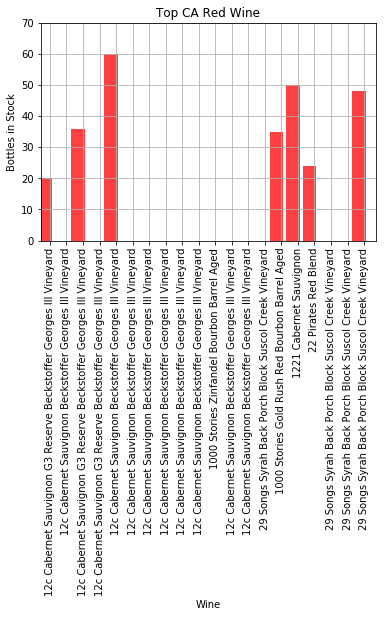

In [9]:
x_axis = np.arange(len(top_20_wine_df["wine"]))
tick_locations = [value+0.3 for value in x_axis]

plt.title("Top CA Red Wine")

plt.xlabel("Wine")
plt.ylabel("Bottles in Stock")
#plt.figure(figsize=(20,6))

plt.xticks(tick_locations, top_20_wine_df["wine"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(top_20_wine_df["bottles_in_stock"])+10)
plt.grid(True)

plt.bar(x_axis, top_20_wine_df["bottles_in_stock"], facecolor="red", alpha=0.75, align="center")


plt.savefig('static/TopWineInStock.png')


plt.show()
